In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from nltk.corpus import stopwords

In [42]:
dataset = pd.read_csv('spam mail.csv')

In [43]:
dataset.head()

,Category,Masseges
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
dataset['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [45]:
dataset.duplicated().sum()
dataset.isna().sum()

Category    0
Masseges    0
dtype: int64

In [46]:
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)

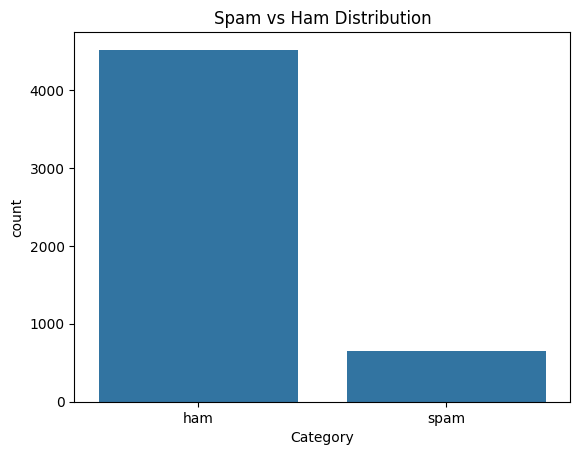

In [47]:
sns.countplot(x=dataset['Category'])
plt.title("Spam vs Ham Distribution")
plt.show()

In [48]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = [w for w in text.split() if w not in stop_words and len(w) > 1]
    return " ".join(words)

In [49]:
dataset['text_clean'] = dataset['Masseges'].apply(clean_text)

In [50]:
dataset[['Masseges', 'text_clean']].head(10)

,Masseges,text_clean
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...
1,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...
3,U dun say so early hor... U c already then say...,dun say early hor already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
5,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling weeks word back id like fu...
6,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
7,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,Had your mobile 11 months or more? U R entitle...,mobile 11 months entitled update latest colour...


In [51]:
X = dataset['text_clean']
y = dataset['Category']

encoder = LabelEncoder()
y = encoder.fit_transform(y)   

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [53]:
models = {
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "LinearSVM": LinearSVC()
}

In [54]:
mnb = MultinomialNB()
lgr = LogisticRegression()
lsv = LinearSVC()

mnb.fit(X_train, y_train)
pred = mnb.predict(X_test)
matrix_mnb = classification_report(y_test, pred)

lgr.fit(X_train, y_train)
pred = lgr.predict(X_test)
matrix_lgr = classification_report(y_test, pred)

lsv.fit(X_train, y_train)
pred = lsv.predict(X_test)
matrix_lsv = classification_report(y_test, pred)

In [55]:
print(matrix_mnb)
print(matrix_lgr)
print(matrix_lsv)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       903
           1       0.86      0.92      0.89       131

    accuracy                           0.97      1034
   macro avg       0.93      0.95      0.94      1034
weighted avg       0.97      0.97      0.97      1034

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       1.00      0.82      0.90       131

    accuracy                           0.98      1034
   macro avg       0.99      0.91      0.95      1034
weighted avg       0.98      0.98      0.98      1034

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       1.00      0.84      0.91       131

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [56]:
results = []
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    trained_models[name] = model

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,MultinomialNB,0.971954,0.864286,0.923664,0.892989
1,LogisticRegression,0.977756,1.000000,0.824427,0.903766
2,LinearSVM,0.979691,1.000000,0.839695,0.912863


In [57]:
best_row = results_df.sort_values("Accuracy", ascending=False).iloc[0]
best_model_name = best_row["Model"]
best_pred = trained_models[best_model_name].predict(X_test)

best_model = trained_models[best_model_name]

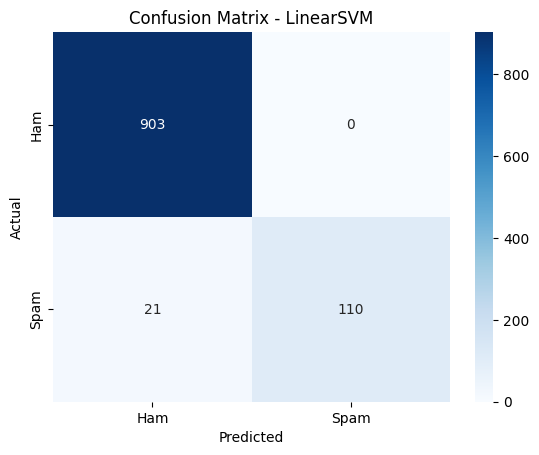

In [58]:
cm = confusion_matrix(y_test, best_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Ham', 'Spam'],
    yticklabels=['Ham', 'Spam']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

In [59]:
new_message = ["Win money now! Click here to claim your prize"]

new_vector = vectorizer.transform(new_message)
encoder.inverse_transform(best_model.predict(new_vector))

array(['spam'], dtype=object)